# Visualize PC explained variance
- This script is used to visualize the principle component explained variance;
- Simulations: LCZ_GM.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'
data_path= f'{home_path}0_lcz_mcr/output_analysis/regional/HVI/'

In [2]:
factor_variation = pd.read_csv(f'{data_path}factor_variation.csv')
factor_variation.head(2)

,cumulative_explained_variance,explained_variance
0,0.304914,0.304914
1,0.505923,0.201009


In [3]:
factor_variation_flat = factor_variation['cumulative_explained_variance'].values.flatten()
factor_variation_flat

array([0.30491386, 0.50592324, 0.64708039, 0.72531477, 0.78135674,
       0.83242377, 0.87907561, 0.91960842, 0.9402705 , 0.95892126,
       0.97399596, 0.98557208, 0.99304443, 1.        ])

In [6]:
linewidth = 0.5
fontsize = 6
labelcolor = '#6b6b6b'
xwidth = 0.5
marker = 'o'
markersize = 2
pad = 1
length = 2
lc0 = '#e41a1c'
lc1 = '#377eb8'
handletextpad = 0.5

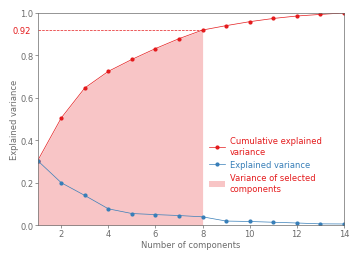

In [7]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 2.5))
ax.plot(factor_variation.index + 1, factor_variation['cumulative_explained_variance'].values, marker=marker, linestyle='-', 
        color=lc0, linewidth=linewidth, markersize = markersize, label = 'Cumulative explained\nvariance')
ax.plot(factor_variation.index + 1, factor_variation['explained_variance'], marker=marker, linestyle='-', color=lc1, 
        linewidth=linewidth, markersize = markersize, label = 'Explained variance')
ax.set_xlim(1, len(factor_variation))
ax.fill_between(range(1, 9), factor_variation_flat[0:8], color=lc0, alpha=0.25, linewidth=0, 
                label='Variance of selected\ncomponents')
ax.set_ylim(0, 1)
ax.plot([1, 8], [factor_variation_flat[7], factor_variation_flat[7]], linestyle='--', color=lc0, linewidth=linewidth)
ax.text(-0.05, factor_variation_flat[7]- 0.015, str(np.round(factor_variation_flat[7],2)), fontsize=fontsize, color=lc0, transform=ax.transData)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=fontsize,pad=pad, width = xwidth, length = length)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelcolor=labelcolor, color=labelcolor,labelsize=fontsize,pad=pad, width = xwidth, length = length)
ax.set_xlabel('Number of components', fontsize=fontsize, color=labelcolor, labelpad = pad)
ax.set_ylabel('Explained variance', fontsize=fontsize, color=labelcolor, labelpad = pad)
for spine in ax.spines.values():
    spine.set_color(labelcolor)
    spine.set_linewidth(xwidth) 
plt.subplots_adjust(left=0.1, right=0.975, bottom=0.1, top=0.95, wspace=0.175, hspace= 0.35)
lines, labels = ax.get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.75, 0.2), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=fontsize, ncol=1)
for t, text in enumerate(legend.get_texts()):
    text.set_color([lc0, lc1, lc0][t])
fig.savefig('pca_result.png', dpi=300)
fig.savefig('pca_result.pdf', dpi=300)